In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Hospitality minds dataset.csv")

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type of Hotel        90000 non-null  object 
 1   Year                 90000 non-null  int64  
 2   Month                90000 non-null  object 
 3   Reservation Date     90000 non-null  object 
 4   Arrival week         90000 non-null  int64  
 5   Arrival Date         90000 non-null  int64  
 6   Weekend Stays        90000 non-null  int64  
 7   Weekday Stays        90000 non-null  int64  
 8   Meal                 90000 non-null  object 
 9   Booking Payment      90000 non-null  object 
 10  Adults               90000 non-null  int64  
 11  Children             89998 non-null  float64
 12  Kids                 90000 non-null  int64  
 13  Country              89629 non-null  object 
 14  Booking Type         90000 non-null  object 
 15  Repeated Guest       90000 non-null 

In [80]:
df.isnull().sum()

Type of Hotel            0
Year                     0
Month                    0
Reservation Date         0
Arrival week             0
Arrival Date             0
Weekend Stays            0
Weekday Stays            0
Meal                     0
Booking Payment          0
Adults                   0
Children                 2
Kids                     0
Country                371
Booking Type             0
Repeated Guest           0
Prev Cancel              0
History                  0
Reserved Room            0
Assigned Room            0
Booking Changes          0
Waiting List             0
Customer                 0
Per Day Charges          0
Parking at premises      0
Physical Challenged      0
Reservation Status       0
Cancellation             0
Booking Done             0
dtype: int64

In [3]:
#replacing all null values 
df['Country'].fillna('XYZ',inplace=True)
df['Children'].fillna(0,inplace=True)
df['Children'] =df['Children'].astype(int)

df['Total_Guests'] =df['Adults'] + df['Children']+df["Kids"]

df =df.drop(['Adults', 'Children','Kids'], axis=1)

df= df[df.Total_Guests > 0]

In [4]:
df=df.rename(columns={'Type of Hotel':'Type_of_Hotel', 'Year':'Year', 'Month':'Month', 'Reservation Date':'Reservation_Date', 'Arrival week':'Arrival_week',
       'Arrival Date':'Arrival_Date', 'Weekend Stays':'Weekend_Stays', 'Weekday Stays':'Weekday_Stays', 'Meal':'Meal',
       'Booking Payment':'Booking_Payment', 'Country':'Country', 'Booking Type':'Booking_Type', 'Repeated Guest':'Repeated_Guest',
       'Prev Cancel':'Prev_Cancel', 'History':'History', 'Reserved Room':'Reserved_Room', 'Assigned Room':'Assigned_Room',
       'Booking Changes':'Booking_Changes', 'Waiting List':'Waiting_List', 'Customer':'Customer', 'Per Day Charges':'Per_Day_Charges',
       'Parking at premises':'Parking_at_premises', 'Physical Challenged':'Physical_Challenged', 'Reservation Status':'Reservation_Status',
       'Cancellation':'Cancellation', 'Booking Done':'Booking_Done', 'Total_Guests':'Total_Guests'})

In [58]:
df.describe()

,Year,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Repeated_Guest,Prev_Cancel,History,Booking_Changes,Waiting_List,Per_Day_Charges,Parking_at_premises,Physical_Challenged,Cancellation,Booking_Done,Total_Guests
count,89875.000000,89875.000000,89875.000000,89875.000000,89875.000000,89875.000000,89875.000000,89875.000000,89875.000000,89875.000000,89875.000000,89875.000000,89875.000000,89875.000000,89875.000000,89875.000000
mean,2016.168701,27.124651,16.408078,0.907794,2.525964,0.031099,0.058325,0.138392,0.226637,1.308762,101.835827,0.064000,0.623599,0.373930,107.332284,1.974887
std,0.708907,13.587168,9.082979,1.000628,1.846244,0.173586,0.431144,1.457724,0.650863,13.375046,47.786580,0.245345,0.817748,0.483848,111.200820,0.679268
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2016.000000,16.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,19.000000,2.000000
50%,2016.000000,27.000000,17.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,2.000000
75%,2017.000000,38.000000,25.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,1.000000,163.000000,2.000000
max,2017.000000,53.000000,31.000000,14.000000,35.000000,1.000000,26.000000,66.000000,16.000000,391.000000,437.000000,2.000000,5.000000,1.000000,629.000000,26.000000


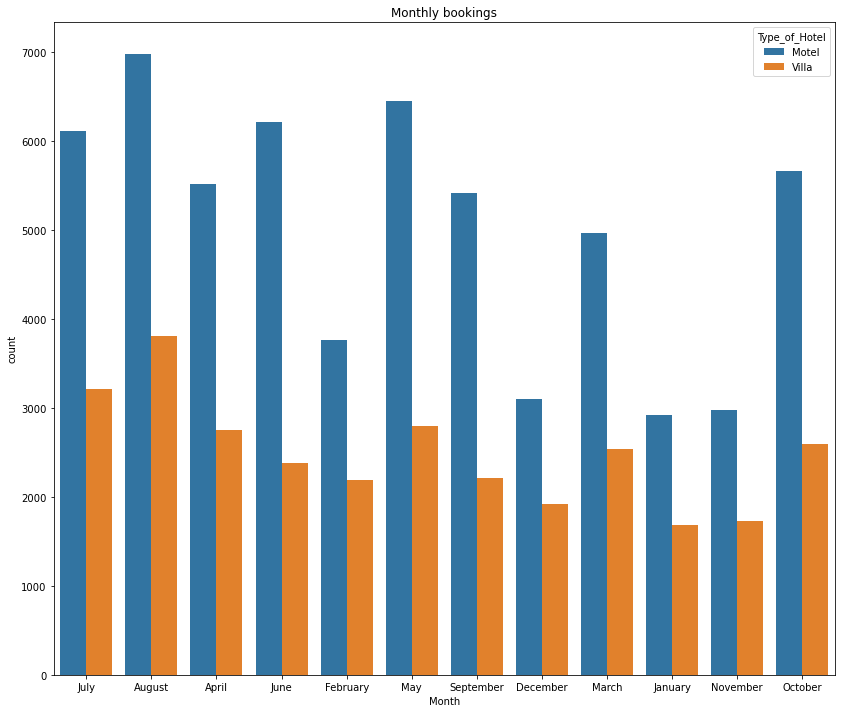

In [59]:
plt.figure(figsize=(14,12))
sns.countplot (x= 'Month', data= df, hue= 'Type_of_Hotel').set_title ('Monthly bookings')
plt.show()

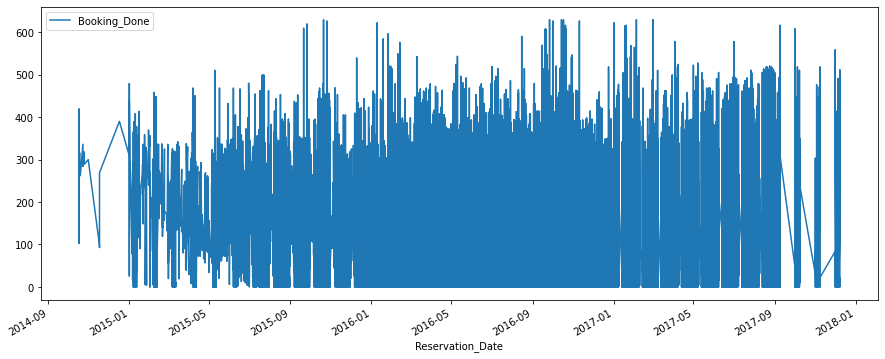

In [60]:
from datetime import datetime
data = pd.DataFrame(df, columns = ['Reservation_Date', 'Booking_Done'])

# Set the Date as Index
data['Reservation_Date'] = pd.to_datetime(data['Reservation_Date'])
data.index = data['Reservation_Date']
del data['Reservation_Date']


#data
data.plot(figsize=(15, 6))
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

d_types = dict(df.dtypes)

for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        df[name] = Le.fit_transform(df[name])

In [13]:
df1=df.filter(["Meal","Bookin_Payment","Booking_Type","Prev_Cancel","Per_Day_Charges","Booking_Done","Cancellation"])

In [14]:
df1.corr()

,Meal,Booking_Type,Prev_Cancel,Per_Day_Charges,Booking_Done,Cancellation
Meal,1.000000,0.137983,-0.022173,0.038398,-0.047024,0.003496
Booking_Type,0.137983,1.000000,-0.128010,0.371937,-0.213224,-0.111263
Prev_Cancel,-0.022173,-0.128010,1.000000,-0.078004,0.096436,0.127043
Per_Day_Charges,0.038398,0.371937,-0.078004,1.000000,-0.078885,0.025919
Booking_Done,-0.047024,-0.213224,0.096436,-0.078885,1.000000,0.298077
Cancellation,0.003496,-0.111263,0.127043,0.025919,0.298077,1.000000


In [88]:
df = df.drop(['Meal','Country','Reserved_Room','Assigned_Room','Booking_Payment','Reservation_Status','Reservation_Date'], axis=1)
df = pd.concat([df, 
                 pd.get_dummies(df['Type_of_Hotel'], drop_first=True), 
                 pd.get_dummies(df['Month'], drop_first=True), 
                 pd.get_dummies(df['Booking_Type'], drop_first=True),
                 pd.get_dummies(df['Customer'], drop_first=True)
                 ], axis=1)
df= df.drop(['Type_of_Hotel','Month','Booking_Type','Customer'], axis=1)

In [89]:
from sklearn.model_selection import train_test_split
# Splitting the data
dummy=pd.get_dummies(df_temp,drop_first=True)
x=dummy.drop(columns='Cancellation')
y=dummy.Cancellation
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify=y,random_state=10)

In [90]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
xtrain=scalar.fit_transform(x_train)
xtest=scalar.transform(x_test)

In [91]:
# Before Procedding to our Base model building we would make an evaluation function that would help us evaluating the
# models with different metrics


# For evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,f1_score,recall_score,precision_score
def evaluation(y_test,y_pred):
    
    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('f1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()
    
# Our evaluation fucntion is now created

In [92]:

# For modelling
from sklearn.ensemble import RandomForestClassifier

xtrain.shape,xtest.shape
rf=RandomForestClassifier()
base_model=rf.fit(xtrain,y_train)
y_pred=base_model.predict(xtest)

Accuracy Score: 0.9999041548857047
f1_score: 0.9998724760892668
Precision: 0.9998724760892668
Recall: 0.9998724760892668
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39076
           1       1.00      1.00      1.00     23525

    accuracy                           1.00     62601
   macro avg       1.00      1.00      1.00     62601
weighted avg       1.00      1.00      1.00     62601



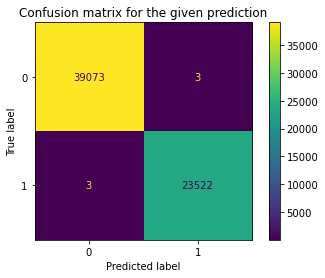

In [93]:
evaluation(y_train,base_model.predict(xtrain))

In [94]:
rf1 = RandomForestClassifier(random_state=42 , n_jobs = -1)

params = {
    'min_samples_leaf':[5,10],
   'n_estimators':[10,20]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf1 , param_grid = params, cv = 5 , n_jobs = -1 , verbose  =1 , scoring="accuracy" )

grid_search.fit(xtrain , y_train)

rf_best = grid_search.best_estimator_
rf_best

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomForestClassifier(min_samples_leaf=10, n_estimators=20, n_jobs=-1,
                       random_state=42)

[Text(641.1159756906252, 534.5400000000001, 'Physical_Challenged <= -0.149\ngini = 0.469\nsamples = 39582\nvalue = [39070, 23531]\nclass = Cancelled'),
 Text(470.6973033679339, 516.4200000000001, 'Booking_Payment <= 1.293\ngini = 0.5\nsamples = 22110\nvalue = [18058, 16986]\nclass = Cancelled'),
 Text(373.20772942897787, 498.3, 'Booking_Changes <= 0.412\ngini = 0.467\nsamples = 18058\nvalue = [17967, 10662]\nclass = Cancelled'),
 Text(271.6199629769244, 480.18, 'Arrival_week <= 0.985\ngini = 0.483\nsamples = 15029\nvalue = [14065, 9720]\nclass = Cancelled'),
 Text(166.86329441431744, 462.06, 'Total_Guests <= -0.688\ngini = 0.49\nsamples = 12048\nvalue = [10924, 8164]\nclass = Cancelled'),
 Text(88.05623462073393, 443.94, 'History <= 0.253\ngini = 0.393\nsamples = 2430\nvalue = [2803, 1029]\nclass = Cancelled'),
 Text(71.04346314325453, 425.82000000000005, 'Meal <= 0.101\ngini = 0.418\nsamples = 2133\nvalue = [2370, 1001]\nclass = Cancelled'),
 Text(52.69867337113512, 407.70000000000005

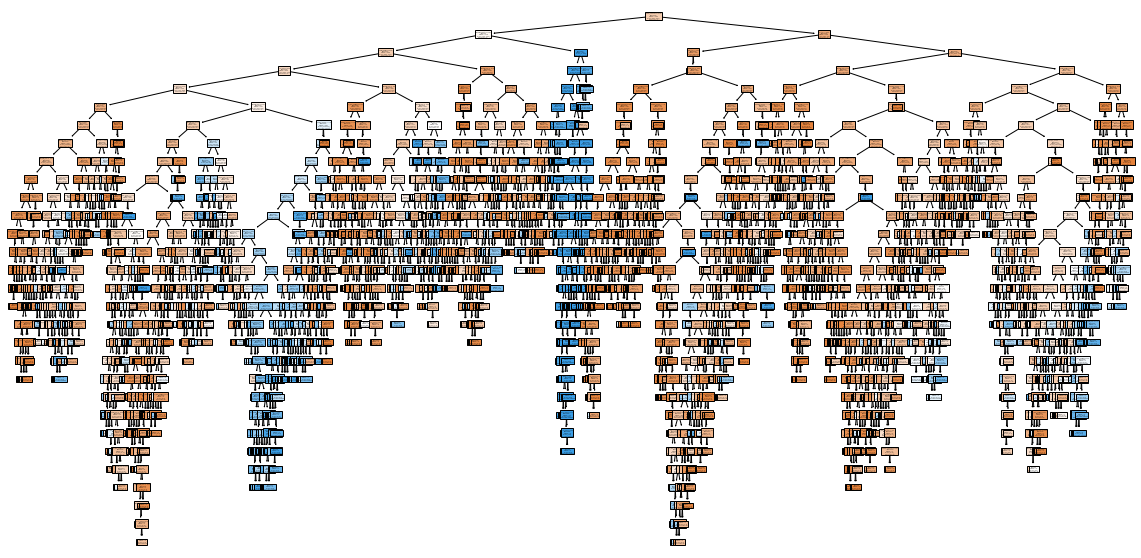

In [95]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,10))
plot_tree(rf_best.estimators_[5] , feature_names = x.columns , class_names = ["Cancelled", "Nod Cancelled"], filled = True)

In [75]:
# Fit and train
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(xtrain,y_train)

# Predict
y_pred = classifier.predict(xtest)



Accuracy Score: 0.9999361032571364
f1_score: 0.9999149840595112
Precision: 0.9999149840595112
Recall: 0.9999149840595112
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39076
           1       1.00      1.00      1.00     23525

    accuracy                           1.00     62601
   macro avg       1.00      1.00      1.00     62601
weighted avg       1.00      1.00      1.00     62601



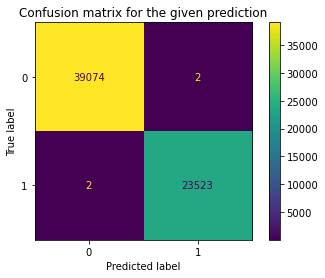

In [76]:
evaluation(y_train,base_model.predict(xtrain))

In [97]:
y_pred.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'